In [3]:
import pandas as pd

df = pd.read_csv('./data/附件1 弱覆盖栅格数据(筛选).csv')
X = df[df['traffic']>3][['x','y']]

In [ ]:
X.shape

In [ ]:
# dbscan 聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['STSong']

Scores = []  # 存放轮廓系数
x_range = range(5,100)
for i in x_range:
    model = DBSCAN(eps=20, min_samples=i)
    # 模型拟合与聚类预测
    y_pred = model.fit_predict(X)
    # Calinski-Harabaz的分数S被定义为组间离散与组内离散的比率，该分值越大说明聚类效果越好。
    # score = calinski_harabasz_score(X, y_pred)
    # davies_bouldin_score越小越好
    score = davies_bouldin_score(X, y_pred)
    Scores.append(score)
    # 检索唯一群集
    # clusters = unique(yhat)

In [ ]:
Scores

In [ ]:
plt.figure(figsize=(5,5))
# plt.subplot(121)
plt.xlabel('min_samples值',fontsize=20)
plt.ylabel('DBI',fontsize=20)
plt.plot(x_range, Scores, 'o-')
# plt.savefig('./img/DBI.png',dpi=300)

In [ ]:
pd.DataFrame(Scores).to_csv('./data/DBI分数.csv',index=False)

In [ ]:
np.argmin(Scores)

In [ ]:
X

运行时间:1.4866878986358643s
1.2803613362830113


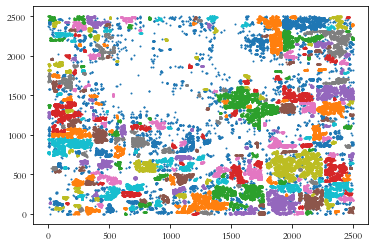

In [4]:
import time
from sklearn.cluster import DBSCAN
import numpy as np
from numpy import unique
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np
start = time.time()
model = DBSCAN(eps=20, min_samples=18)
# 模型拟合与聚类预测
y_pred = model.fit_predict(X)
end = time.time()
print('运行时间:{}s'.format(end-start))
score = davies_bouldin_score(X, y_pred)
print(score)
# 检索唯一群集
clusters = unique(y_pred)
# 为每个群集的样本创建散点图
for i,cluster in enumerate(clusters):
    # print(cluster)
    # 获取此群集的示例的行索引
    row_ix = np.where(y_pred == cluster)
    # print(row_ix[0])
    x = X.iloc[row_ix[0]]['x']
    y = X.iloc[row_ix[0]]['y']
    # 创建这些样本的散布
    plt.scatter(x,y, 1)
# 绘制散点图
# plt.savefig('./img/去噪后聚类-DBI最大值-min_samples18.png',dpi=500)
plt.show()

In [5]:
len(clusters)

365

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=365, init='k-means++',random_state=2022)
# 模型拟合与聚类预测
y_pred = model.fit_predict(X)
clusters = unique(y_pred)



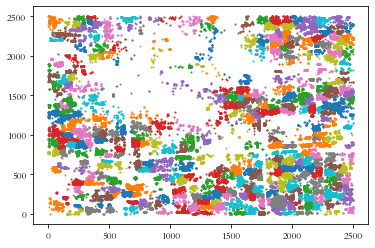

In [9]:
# 为每个群集的样本创建散点图
for i,cluster in enumerate(clusters):
    # print(cluster)
    # 获取此群集的示例的行索引
    row_ix = np.where(y_pred == cluster)
    # print(row_ix[0])
    x = X.iloc[row_ix[0]]['x']
    y = X.iloc[row_ix[0]]['y']
    # 创建这些样本的散布
    plt.scatter(x,y, 1)
# 绘制散点图
plt.savefig('./img/kemeans++去噪后.png',dpi=500)
plt.show()

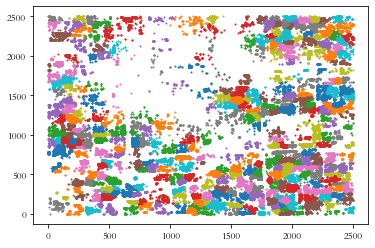

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
df = pd.read_csv('./data/附件1 弱覆盖栅格数据(筛选).csv')
X = df[['x','y']]

model = KMeans(n_clusters=365, init='k-means++',random_state=2022)
# 模型拟合与聚类预测
y_pred = model.fit_predict(X)
clusters = unique(y_pred)
# 为每个群集的样本创建散点图
for i,cluster in enumerate(clusters):
    # print(cluster)
    # 获取此群集的示例的行索引
    row_ix = np.where(y_pred == cluster)
    # print(row_ix[0])
    x = X.iloc[row_ix[0]]['x']
    y = X.iloc[row_ix[0]]['y']
    # 创建这些样本的散布
    plt.scatter(x,y, 1)
# 绘制散点图
plt.savefig('./img/kemeans++去噪前.png',dpi=500)
plt.show()

In [ ]:
import time
from sklearn.cluster import DBSCAN
import numpy as np
from numpy import unique
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np
start = time.time()
model = DBSCAN(eps=20, min_samples=44)
# 模型拟合与聚类预测
y_pred = model.fit_predict(X)
end = time.time()
print('运行时间:{}s'.format(end-start))
score = davies_bouldin_score(X, y_pred)
print(score)
# 检索唯一群集
clusters = unique(y_pred)
# 为每个群集的样本创建散点图
for i,cluster in enumerate(clusters):
    # print(cluster)
    # 获取此群集的示例的行索引
    row_ix = np.where(y_pred == cluster)
    # print(row_ix[0])
    x = X.iloc[row_ix[0]]['x']
    y = X.iloc[row_ix[0]]['y']
    # 创建这些样本的散布
    plt.scatter(x,y, 1)
# 绘制散点图
plt.savefig('./img/去噪后聚类-DBI最小值-min_samples44.png',dpi=500)
plt.show()

# 3 OPTICS算法

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time
import operator
from numpy import unique
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
def compute_squared_EDM(X):
  return squareform(pdist(X,metric='euclidean'))
# 显示决策图
def plotReachability(data,eps):
    plt.figure()
    plt.plot(range(0,len(data)), data)
    plt.plot([0, len(data)], [eps, eps])
    plt.show()
# 显示分类的类别
def plotFeature(data,labels):
    clusterNum = len(set(labels))
    fig = plt.figure()
    scatterColors = ['black', 'blue', 'green', 'yellow', 'red', 'purple', 'orange', 'brown']
    ax = fig.add_subplot(111)
    for i in range(-1, clusterNum):
        colorSytle = scatterColors[i % len(scatterColors)]
        subCluster = data[np.where(labels == i)]
        ax.scatter(subCluster[:, 0], subCluster[:, 1], c=colorSytle, s=12)
    plt.show()
def updateSeeds(seeds,core_PointId,neighbours,core_dists,reach_dists,disMat,isProcess):
    # 获得核心点core_PointId的核心距离
    core_dist=core_dists[core_PointId]
    # 遍历core_PointId 的每一个邻居点
    for neighbour in neighbours:
        # 如果neighbour没有被处理过，计算该核心距离
        if(isProcess[neighbour]==-1):
            # 首先计算改点的针对core_PointId的可达距离
            new_reach_dist = max(core_dist, disMat[core_PointId][neighbour])
            # 如果可达距离没有被计算过，将计算的可达距离赋予
            if(np.isnan(reach_dists[neighbour])):
                reach_dists[neighbour]=new_reach_dist
                seeds[neighbour] = new_reach_dist
            # 如果可达距离已经被计算过，判读是否要进行修改
            elif(new_reach_dist<reach_dists[neighbour]):
                reach_dists[neighbour] = new_reach_dist
                seeds[neighbour] = new_reach_dist
    return seeds
def OPTICS_PLUS(data,eps=np.inf,minPts=15):
    # 获得距离矩阵
    orders = []
    disMat = compute_squared_EDM(data)
    # 获得数据的行和列(一共有n条数据)
    n, m = data.shape
    # np.argsort(disMat)[:,minPts-1] 按照距离进行 行排序 找第minPts个元素的索引
    # disMat[np.arange(0,n),np.argsort(disMat)[:,minPts-1]] 计算minPts个元素的索引的距离
    temp_core_distances = disMat[np.arange(0,n),np.argsort(disMat)[:,minPts-1]]
    # 计算核心距离
    core_dists = np.where(temp_core_distances <= eps, temp_core_distances, -1)
    # 将每一个点的可达距离未定义
    reach_dists= np.full((n,), np.nan)
    # 将矩阵的中小于minPts的数赋予1，大于minPts的数赋予零，然后1代表对每一行求和,然后求核心点坐标的索引
    core_points_index = np.where(np.sum(np.where(disMat <= eps, 1, 0), axis=1) >= minPts)[0]
    # 用于标识是否被处理，没有被处理，设置为-1
    isProcess = np.full((n,), -1)
    # 遍历所有的核心点
    for pointId in core_points_index:
        # 如果核心点未被分类，将其作为的种子点，开始寻找相应簇集
        if (isProcess[pointId] == -1):
            # 将点pointId标记为当前类别(即标识为已操作)
            isProcess[pointId] = 1
            orders.append(pointId)
            # 寻找种子点的eps邻域且没有被分类的点，将其放入种子集合
            neighbours = np.where((disMat[:, pointId] <= eps) & (disMat[:, pointId] > 0) & (isProcess == -1))[0]
            seeds = dict()
            seeds=updateSeeds(seeds,pointId,neighbours,core_dists,reach_dists,disMat,isProcess)
            while len(seeds)>0:
                nextId = sorted(seeds.items(), key=operator.itemgetter(1))[0][0]
                del seeds[nextId]
                isProcess[nextId] = 1
                orders.append(nextId)
                # 寻找newPoint种子点eps邻域（包含自己）
                # 这里没有加约束isProcess == -1，是因为如果加了，本是核心点的，可能就变成了非和核心点
                queryResults = np.where(disMat[:, nextId] <= eps)[0]
                if len(queryResults) >= minPts:
                    seeds=updateSeeds(seeds,nextId,queryResults,core_dists,reach_dists,disMat,isProcess)
                # 簇集生长完毕，寻找到一个类别
    # 返回数据集中的可达列表，及其可达距离
    return orders,reach_dists
def extract_dbscan(data,orders, reach_dists, eps):
    # 获得原始数据的行和列
    n,m=data.shape
    # reach_dists[orders] 将每个点的可达距离，按照有序列表排序（即输出顺序）
    # np.where(reach_dists[orders] <= eps)[0]，找到有序列表中小于eps的点的索引，即对应有序列表的索引
    reach_distIds=np.where(reach_dists[orders] <= eps)[0]
    # 正常来说：current的值的值应该比pre的值多一个索引。如果大于一个索引就说明不是一个类别
    pre=reach_distIds[0]-1
    clusterId=0
    labels=np.full((n,),-1)
    for current in reach_distIds:
        # 正常来说：current的值的值应该比pre的值多一个索引。如果大于一个索引就说明不是一个类别
        if(current-pre!=1):
            # 类别+1
            clusterId=clusterId+1
        labels[orders[current]]=clusterId
        pre=current
    return labels

orders,reach_dists=OPTICS_PLUS(X,np.inf,30)
y_pred=extract_dbscan(X,orders,reach_dists,3)

# 检索唯一群集
clusters = unique(y_pred)
# 为每个群集的样本创建散点图
for i,cluster in enumerate(clusters):
    # print(cluster)
    # 获取此群集的示例的行索引
    row_ix = np.where(y_pred == cluster)
    # print(row_ix[0])
    x = X.iloc[row_ix[0]]['x']
    y = X.iloc[row_ix[0]]['y']
    # 创建这些样本的散布
    plt.scatter(x,y, 1)
plt.show()
